### La meva primera xarxa neuronal utilitzant Python i  Tensorflow.

> L'objetiu es utilitzar una xarxa neuronal simple, que faci una funció  especifica i ens permeti veure el seu funcionament. 

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [4]:
# Especifiquem la llibreria keras de Tensorflow que ens permet treballar amb xarxes neuronals
# Les capes denses son las que tenen conexions des de cada neurona fins cada neurona de la següent capa
# #input_shape[1] indica que d'entrada tindrà una neurona
# units=1 indica que de capa de sortida tindrà una neurona

# Opció 1
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

# Opció 2
#oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
#oculta2 = tf.keras.layers.Dense(units=3)
#salida = tf.keras.layers.Dense(units=1)
#modelo = tf.keras.Sequential([oculta1, oculta2, salida])

d:\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#Adam permet ajustar els pesos i el sesgo perque cada vegada vagi acostant-se més a la solució
#El valor es la magnitud en la que va ajustant. Si el fem més petit tardarà més, si el fem més gran
#potser es pasaran.
# model de perdua
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [6]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


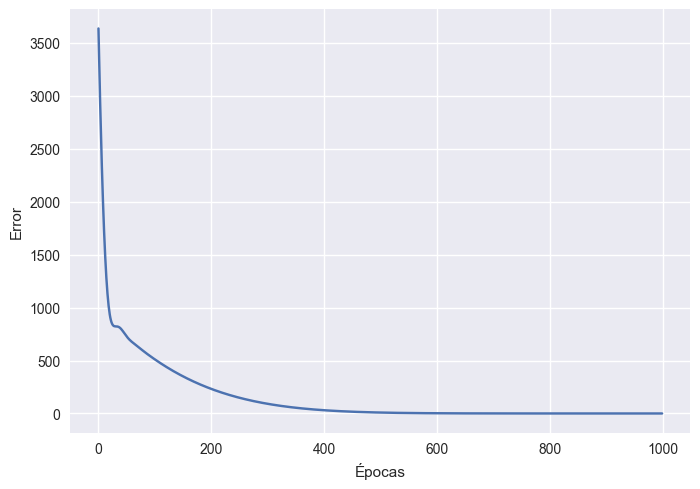

In [11]:
import matplotlib.pyplot as plt

#plt.style.use('seaborn')
plt.style.use('seaborn-v0_8')
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.plot(historial.history['loss'])


In [13]:
print('Hagamos una predicción!')
result = modelo.predict(np.array([100.0]))
print('El resultado es: ', result, 'grados Fahrenheit')

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
El resultado es:  [[211.74284]] grados Fahrenheit


In [15]:
print('variables internas del modelo')
# Opción 1
print(capa.get_weights())

# Opción 2
#print(oculta1.get_weights())
#print(oculta2.get_weights())
#print(salida.get_weights())

variables internas del modelo
[array([[1.7982217]], dtype=float32), array([31.920666], dtype=float32)]
